# Code to Measure the Aspiration. (Beta)

This code has been developed by Samadarshi Maity to Meaure the aspiration of a spheroid over a certain period of time.

The following idea has been implemented<br>
1.> The preprocess the file (.czi) using imageJ and Zen such that you make it completely black and white (binary file)<br> 
    <li> Crop the section that you want to examine and correctly adjust the sides
    <l1> Import the sequence into ImageJ 
    <li> Create "Binary" and "Fill holes" in the "Process" option       
    <li> Save as a image sequence of jpg format  
2.> Store it in the .jpg format and load them using the code set over here.<br>


In [1]:
import scipy as s
from scipy import optimize as opp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import czifile as c
import cv2 
from czifile import CziFile as cf
import argparse as ar1
import pandas as pd
from scipy.stats import skew

ModuleNotFoundError: No module named 'czifile'

## Some random functions that might be useful

In [4]:
'''
with cf('trial_code.czi') as czi:
    image_arrays = czi.asarray()
image_info = image_arrays.shape
image_inf
plt.figure(figsize = (9,9))
cv2.imshow("tyyy", image_arrays[39,0])
cv2.WINDOW_NORMAL
cv2.waitKey(0)
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", help = "path to the image")
args = vars(ap.parse_args())
# load the image
image = cv2.imread(args["image"])

imgg = cv2.imread("trial_code.jpg")
cv2.imwrite("try2.jpg", image_arrays[39,0])

# converting to grayscale format
# parsing the .czi file into cv2 functions is not possible
# you need to preprocess the data to convert into binary
# that is the sfastest way that is possible

imggray = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)

# convert image into "canny" format to pick up the edges of te images. 
# canny does not work for my images maybe different settings might be needed.
imgcanny = cv2.Canny(imgg, 100, 200)
cv2.imwrite("ttry.jpg",imgcanny)

# try to dilate the image 
kernel = np.ones((5,5), np.uint8)
imgdilation = cv2.dilate(imgcanny, kernel, iterations = 1)
cv2.imwrite("tttt.jpg", imgdilation)
'''

'\nwith cf(\'trial_code.czi\') as czi:\n    image_arrays = czi.asarray()\nimage_info = image_arrays.shape\nimage_inf\nplt.figure(figsize = (9,9))\ncv2.imshow("tyyy", image_arrays[39,0])\ncv2.WINDOW_NORMAL\ncv2.waitKey(0)\n# construct the argument parse and parse the arguments\nap = argparse.ArgumentParser()\nap.add_argument("-i", "--image", help = "path to the image")\nargs = vars(ap.parse_args())\n# load the image\nimage = cv2.imread(args["image"])\n\nimgg = cv2.imread("trial_code.jpg")\ncv2.imwrite("try2.jpg", image_arrays[39,0])\n\n# converting to grayscale format\n# parsing the .czi file into cv2 functions is not possible\n# you need to preprocess the data to convert into binary\n# that is the sfastest way that is possible\n\nimggray = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)\n\n# convert image into "canny" format to pick up the edges of te images. \n# canny does not work for my images maybe different settings might be needed.\nimgcanny = cv2.Canny(imgg, 100, 200)\ncv2.imwrite("ttry.

## From here starts the code

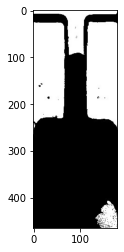

In [2]:
# Open a file with the binary image
tasp = cv2.imread("imagestack1\Big_aggregate0004.jpg");
plt.imshow(tasp)
#cv2.waitKey(0)

## Section 1: Mask Alignment and Channel Section Identification

The following steps have been taken to track the aspiration
<br>
Idea description:<br>


In [3]:
# the order is as  follows:<br>
# row element (left indice) controls the y axis and the column element (right indice) for x-axis
data =  tasp[400, 50]
print(data)

[0 0 0]


In [4]:
# Check the channel for emptyness and see whether the the alignment is correct.
# Or find the range fo the alignment 

# set the range based on the above image
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Input the data here~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
range_y = [0, 80]
range_x = [80, 100] # this is for single constriction, easily expandable to multiple contrictions by chnaging h 
mask_locator = tasp
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
store_x_range = []

# Set flag and counters
flag_1 = 0    
flag_2 = 0
counter = 0

for i in range(range_x[0], range_x[1]):
    counter  = 0
    for j in range(range_y[0], range_y[1]):
        
        check_binary = mask_locator[j,i]
        if(check_binary[0] <=0): 
            counter += 1
            break;
    if (counter == 0):
        store_x_range.append(i)
        
# Now, we extract the cross-section of the channel dimension.
# here we identify the exact margins and remove numerical anomalies
channel_section = []
i = 1
while(i<len(store_x_range)-1):
    
    value = store_x_range[i]
    if ((value+1) == store_x_range[i+1] and (value-1) == store_x_range[i-1]):
        channel_section.append(store_x_range[i])
    i += 1
print(channel_section)

[81, 82, 83, 84, 85, 86, 87, 88, 92, 93, 94, 95, 96, 97, 98]


In [ ]:
# function to plot a histogram of the different scales along the x axis. (Do this)



## Section 2: Now Load the images and measure the elongation

This section contains the code for the reading operation. <br>
1.> Setup a robust naming operation by creating a function for correct naming<br>
2.> Call the images using te correct naming sequence<br>
3.> Process the image and extract the data <br>


### Part:1  Now we define the naming function

In [5]:
# This is a naming function 
# The name will contain a base name, a starting value and an ending value for the sequence 
# works upto 10000 images
def Naming(base_name, sv, fv, digits):
        """
        Params:
        Base_name: The parent name of the file
        sv: Starting point of the series
        fv: Ending point of the series
        digits: How many digits are present after the base name
        """
        full_name = []
        zero = str(0)
        name = base_name
        total_zero = ""
        for i in range(sv, fv+1):
            if (i<10):
                add_zeros = digits-1
                for j in range(add_zeros):
                    total_zero = total_zero + zero
            
            if (i>= 10 and i<100):
                add_zeros = digits-2
                for j in range(add_zeros):
                    total_zero = total_zero + zero
            
            if (i>= 100 and i<1000):
                add_zeros = digits-3
                for j in range(add_zeros):
                    total_zero = total_zero + zero
                    
            if (i>= 1000 and i<10000):
                add_zeros = digits-4
                for j in range(add_zeros):
                    total_zero = total_zero + zero        
               
            full_name.append(base_name+total_zero+str(i)+".jpg")
            total_zero = "" 
        return full_name

### Part 2: Now we call the function to load image (call it multiple times to load multiple image stack)

In [7]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Input variable are mentioned here~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

basename = "imagestack\stats_1_check" 
digits = 4
start_value = 54
end_value = 232
name_array = Naming(basename, start_value, end_value, digits)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [8]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Input variable are mentioned here~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

basename1 = "imagestack\stats_1_check" 
digits1 = 4
start_value1 = 495
end_value1 = 982
name_array1 = Naming(basename1, start_value1, end_value1, digits1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [9]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Input variable are mentioned here~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

basename2 = "imagestack1\Big_aggregate" 
digits2= 4
start_value2 = 0
end_value2 = 385
name_array2 = Naming(basename2, start_value2, end_value2, digits2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Part 3: Write a function to measure the aspiration in a single image

In this part we will do the following:<br>
1.> Measure the elongation with respect to time
2.> Measure the change in the perimeter with respect to time.


In [6]:
#check this properly
# this secton is not very easy.

def Aspiration(filename, channel,reference_point):
    """
    params: Channel: Upper and Lower bound of x-pixels in the channel. (Provide it as a list)
    name: the name of the file exactly the way it is created using the previous function
    reference_point: This is a reference poitn from which the measurement needs to be taken
    """
    image = cv2.imread(filename)
    extension_adder = 0
    extension = 0
    extension_tray = []
    for i in range(channel[0], channel[1]):
        for j in range(reference_point):
            data1, data2, data3 = image[j,i]
    
            if(data1<=0):
                extension = reference_point - j    
                extension_tray.append(extension)
                break
    return extension_tray        

In [14]:
a = Aspiration(name_array2[2], [82,83], 240)
a

[141]

### Part 4: Measurement of displacement across multiple images

The following steps has been used for the measurement:<br>
1.> Combine the entire operations and successively measure the aspiration<br>
2.> Create a final-profile with all the information


In [10]:
def Displacement(namearray, channel, reference_point):
    """
    Params:
    namearray: name of the file
    channel: upper and lower channel bounds
    reference_point: extension reference
    Lratio: displacement to pixel ratio
    """
    creep_bundle_mean = []  
    creep_bundle_std = []
    frame_index = []
    
    for i in range(1,len(namearray)):
        
        data = Aspiration(namearray[i], channel, reference_point)
        mean_extension = np.mean(data)
        std_extension = np.std(data)
        creep_bundle_mean.append(mean_extension)
        creep_bundle_std.append(std_extension)
        frame_index.append(i)
        
        if (creep_bundle_mean[0] != 0):
            creep_bundle_mean.insert(0,0)
            creep_bundle_std.insert(0,0)
            frame_index.insert(0,0)
        
    return creep_bundle_mean, creep_bundle_std, frame_index

## Section 3: Plotting and processing the data

The following section deals with the process of the data:<br>
1> Plotting the extension with respect to time<br>
2> fitting different models and checking for fit<br>
3> Computing properties<br>

## Part 1: Plotting the data

In [11]:
# Aspiration at Higher pressure 
# Define a dataframe and work using a dataframe
# database will hold all the necessary data of the aspiration.

Database = pd.DataFrame()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Input parameters~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
time_steps = 0.91 # snaps per second
channel_dimensions = [58,65]
reference_point = 250
distance_to_pixel_ratio = 1.3 # microns per pixel
creep_data = Displacement(name_array, channel_dimensions, reference_point)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Pressure difference = 
Database["Serial number"] = creep_data[2]
Database["Time Step (secs)"] = Database["Serial number"]*time_steps
Database["Creep ($\mu$m)"] = creep_data[0]
Database["Creep Std.Dev. ($\mu$m)"] = creep_data[1]

In [12]:
Database

,Serial number,Time Step (secs),Creep ($\mu$m),Creep Std.Dev. ($\mu$m)
0,0,0.00,0.000000,0.000000
1,1,0.91,69.857143,0.989743
2,2,1.82,97.428571,0.494872
3,3,2.73,107.000000,0.755929
4,4,3.64,114.285714,0.451754
...,...,...,...,...
174,174,158.34,188.000000,0.000000
175,175,159.25,188.714286,0.699854
176,176,160.16,189.857143,0.638877
177,177,161.07,192.000000,0.000000


In [77]:
# Aspiration at Lower Pressure 
# Define a dataframe and work using a dataframe
# database will hold all the necessary data of the aspiration.

Database2 = pd.DataFrame()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Input parameters~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
time_steps2 = 0.93 # snaps per second
channel_dimensions2 = [82,84]
reference_point2 = 240
distance_to_pixel_ratio2 = 1.3 # microns per pixel
creep_data2 = Displacement(name_array2, channel_dimensions2, reference_point2)
# Pressure difference = 
Database2["Serial number"] = creep_data2[2]
Database2["Time Step (secs)"] = Database2["Serial number"]*time_steps2
Database2["Creep ($\mu$m)"] = creep_data2[0]
Database2["Creep Std.Dev. ($\mu$m)"] = creep_data2[1]
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [78]:
Database2

,Serial number,Time Step (secs),Creep ($\mu$m),Creep Std.Dev. ($\mu$m)
0,0,0.00,0.0,0.0
1,1,0.93,139.5,0.5
2,2,1.86,141.0,0.0
3,3,2.79,144.0,0.0
4,4,3.72,145.0,0.0
...,...,...,...,...
381,381,354.33,237.0,0.0
382,382,355.26,236.5,0.5
383,383,356.19,236.5,0.5
384,384,357.12,237.0,0.0


Text(0.5, 1.0, 'Creep Response vs time')

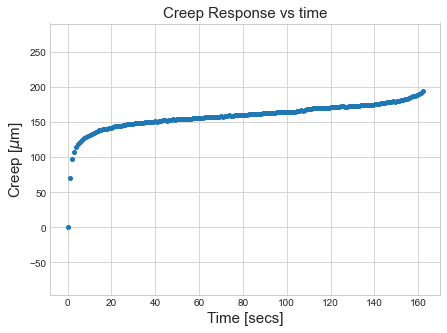

In [276]:
plt.figure(figsize =(7,5))
plt.plot(Database["Time Step (secs)"], Database["Creep ($\mu$m)"], marker = "o", linestyle = "none", markersize = "4")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)

Text(0.5, 1.0, 'Creep Response vs time')

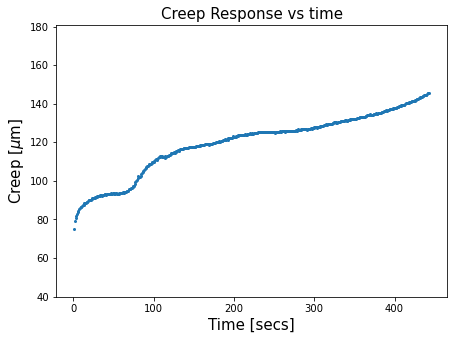

In [81]:
plt.figure(figsize =(7,5))
plt.plot(Database1["Time Step (secs)"], Database1["Creep ($\mu$m)"], marker = "o", linestyle = "none", markersize = "2")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)

Text(0.5, 1.0, 'Creep Response vs time')

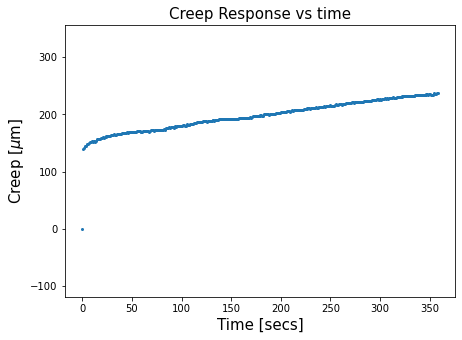

In [82]:
plt.figure(figsize =(7,5))
plt.plot(Database2["Time Step (secs)"], Database2["Creep ($\mu$m)"], marker = "o", linestyle = "none", markersize = "2")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)

## Part 2: Develop a function to perform least square operation

1> We will use the lst.linalg for least square fitting<br>
2> Check and plot the residuals and see the best fit for all the models<br>
3> 

In [14]:
xvalues = Database["Time Step (secs)"]
yvalues = Database["Creep ($\mu$m)"] 

## Part 3: Fitting different viscoelastic models

1.> Kelvin Voigt Model<br>
2.> Maxwell Model<br>
3.> Zener (SLL) Model or the Jeffery's model<br>
4.> Modified Maxwell Model<br>
5.> Burgers Model<br>
6.> Power Law Model

All the fitting will be undertaken using the least square fit.<br>
Following are the least square fitting technique:<br>
    1> First arrange the data in a numpy array or DataFrame using pandas<br>
    2> Create a function with the name of the model<br>

In [32]:
# we shall use the scipy .optimize function to use the least square fitting for our analysis 
# coefficient of determination is "Not" the bets method to study the measurement.

C:\Users\Prithvish\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


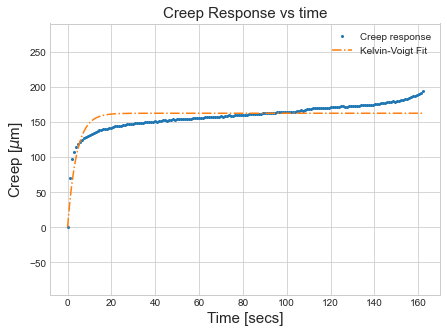

In [29]:
# First we will fit the Kelvin-Voigt model

def Kelvin_Voigt(t, A, B):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
    return A*(1-np.exp(-t/B))

def Residual_Kelvin_Voigt(p, x, y):
    
    return (y - Kelvin_Voigt(x, *p))

KV0 = [10., 10.]

DataKVopt, conv = opp.leastsq(Residual_Kelvin_Voigt, KV0, args = (xvalues, yvalues))

YfitKV = Kelvin_Voigt(xvalues, *DataKVopt) 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.figure(1, figsize =(7,5))
plt.plot(Database["Time Step (secs)"], Database["Creep ($\mu$m)"],  marker = "o", linestyle = "none", markersize = "2", label = "Creep response")
plt.plot(Database["Time Step (secs)"], YfitKV, linestyle = "-.", markersize = "2", label = "Kelvin-Voigt Fit")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)
plt.legend()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [30]:
DataKVopt

array([162.89435487,   4.05739113])

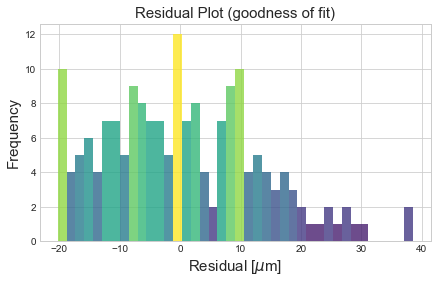

In [270]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Now we plot the residuals~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(2, figsize = (7,4))
plt.style.use("seaborn-whitegrid")
Residuals = yvalues - YfitKV 
n, bins, patches = plt.hist(Residuals, bins = 40, alpha = 0.8, linewidth = 0.5)
n = n.astype("int")
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
plt.xlabel("Residual [$\mu$m]", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("Residual Plot (goodness of fit)", size = 15)
check1 = skew(Residuals)

In [261]:
check1

0.436153148955091

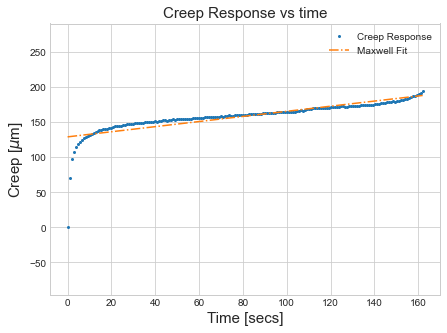

In [31]:
# Now, we will fit the Maxwell model

def Maxwell(t, A, B):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
    return A*(1 + t/B)

def Residual_Maxwell(p, x, y):
    
    return (y - Maxwell(x, *p))

M0 = [10., 10.]

DataMopt, conv = opp.leastsq(Residual_Maxwell, M0, args = (xvalues, yvalues))

YfitM = Maxwell(xvalues, *DataMopt) 

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.figure(figsize =(7,5))
plt.plot(Database["Time Step (secs)"], Database["Creep ($\mu$m)"],  marker = "o", linestyle = "none", markersize = "2", label = "Creep Response")
plt.plot(Database["Time Step (secs)"], YfitM, linestyle = "-.", markersize = "2", label = "Maxwell Fit")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)
plt.legend()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [32]:
DataMopt

array([129.16618784, 353.84753333])

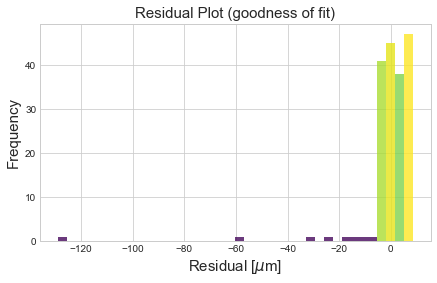

In [271]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Now we plot the residuals~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(2, figsize = (7,4))
plt.style.use("seaborn-whitegrid")
Residuals = yvalues - YfitM 
n, bins, patches = plt.hist(Residuals, bins = 40, alpha = 0.8, linewidth = 0.5)
n = n.astype("int")
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
plt.xlabel("Residual [$\mu$m]", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("Residual Plot (goodness of fit)", size = 15)
check1 = skew(Residuals)

In [265]:
check1

-7.817558512729202

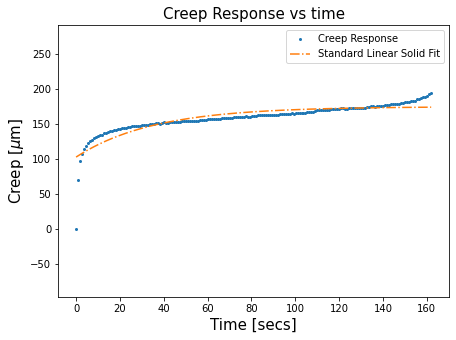

In [16]:
# Now, we will fit the Standard Linear Solid model or the Zener model

def Std_linear_solid(t, A, B, C):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
    return A + B*np.exp(-t/C)

def Residual_Std_linear_solid(p, x, y):
    
    return (y - Std_linear_solid(x, *p))

SLS0 = [1., -1., 10.]

DataSLSopt, conv = opp.leastsq(Residual_Std_linear_solid, SLS0, args = (xvalues, yvalues))

YfitSLS = Std_linear_solid(xvalues, *DataSLSopt) 

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.figure(figsize =(7,5))
plt.plot(Database["Time Step (secs)"], Database["Creep ($\mu$m)"],  marker = "o", linestyle = "none", markersize = "2", label = "Creep Response")
plt.plot(Database["Time Step (secs)"], YfitSLS, linestyle = "-.", markersize = "2", label = "Standard Linear Solid Fit")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)
plt.legend()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [33]:
DataSLSopt

array([174.43970358, -71.96846663,  35.46257581])

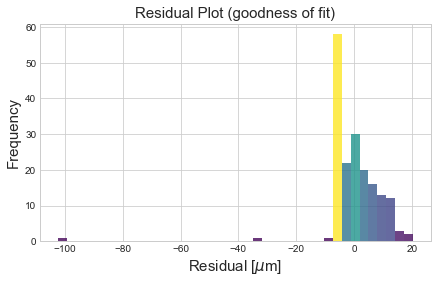

In [17]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Now we plot the residuals~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(2, figsize = (7,4))
plt.style.use("seaborn-whitegrid")
Residuals = yvalues - YfitSLS 
n, bins, patches = plt.hist(Residuals, bins = 40, alpha = 0.8, linewidth = 0.5)
n = n.astype("int")
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
plt.xlabel("Residual [$\mu$m]", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("Residual Plot (goodness of fit)", size = 15)
check1 = skew(Residuals)

In [19]:
check1 

-5.412605010119834

[   0.29933655 -136.31120679    1.74337491]


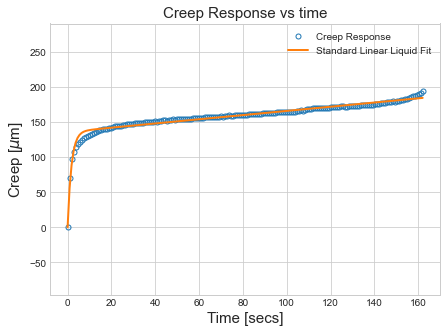

In [274]:
# Now, we will fit the Standard Linear liquid model also known as the Jefferys model or the Anti-Zener model

def Std_linear_liquid(t, A, B, C):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
    return A*t - B*(1-np.exp(-t/C))

def Residual_Std_linear_liquid(p, x, y):
    return (y - Std_linear_liquid(x, *p))

SLL0 = [100., 100., 100.]

DataSLLopt, conv = opp.leastsq(Residual_Std_linear_liquid, SLL0, args = (xvalues, yvalues))

YfitSLL = Std_linear_liquid(xvalues, *DataSLLopt) 
print(DataSLLopt)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.figure(figsize =(7,5))
plt.plot(Database["Time Step (secs)"], Database["Creep ($\mu$m)"],  marker = "o", linestyle = "none", markersize = "5", label = "Creep Response", fillstyle = "none")
plt.plot(Database["Time Step (secs)"], YfitSLL, linestyle = "-", linewidth ="2", markersize = "2", label = "Standard Linear Liquid Fit")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)
plt.legend()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

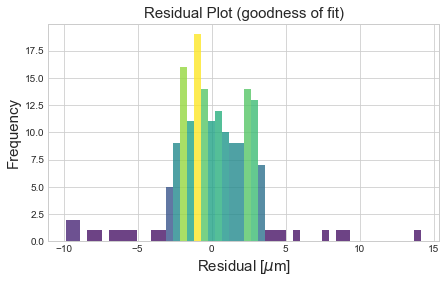

In [275]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Now we plot the residuals~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(2, figsize = (7,4))
plt.style.use("seaborn-whitegrid")
Residuals = yvalues - YfitSLL
n, bins, patches = plt.hist(Residuals, bins = 50, alpha = 0.8, linewidth = 0.5)
n = n.astype("int")
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
plt.xlabel("Residual [$\mu$m]", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("Residual Plot (goodness of fit)", size = 15)
check1 = skew(Residuals)


In [263]:
check1

0.00043189774492506937

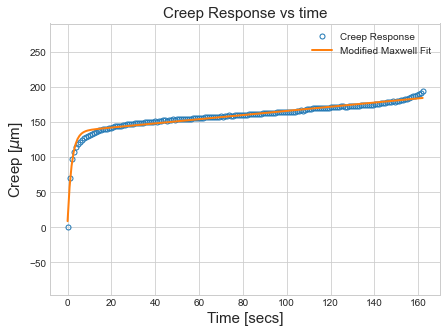

In [34]:
# Now, we will fit the Modified Maxwell Model by Brochart Wyat et al. (Aspiration of Viscoelastic Drops)

def Modified_Maxwell(t, A, B, C, D):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
    return A*t - B - C*np.exp(-t/D)

def Residual_Modified_Maxwell(p, x, y):
    return (y - Modified_Maxwell(x, *p))

MM0 = [1., 1., 1., 1]

DataMMopt, conv = opp.leastsq(Residual_Modified_Maxwell, MM0, args = (xvalues, yvalues))

YfitMM = Modified_Maxwell(xvalues, *DataMMopt) 

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.figure(figsize =(7,5))
plt.plot(Database["Time Step (secs)"], Database["Creep ($\mu$m)"],  marker = "o", linestyle = "none", markersize = "5", label = "Creep Response", fillstyle = "none")
plt.plot(Database["Time Step (secs)"], YfitMM, linestyle = "-", linewidth ="2", markersize = "2", label = "Modified Maxwell Fit")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)
plt.legend()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

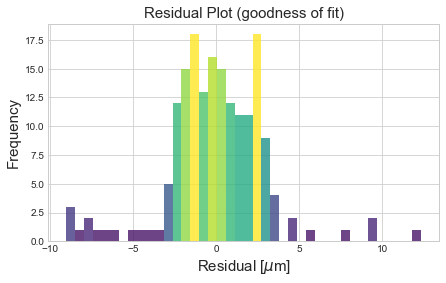

In [22]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Now we plot the residuals~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(2, figsize = (7,4))
plt.style.use("seaborn-whitegrid")
Residuals = yvalues - YfitMM
n, bins, patches = plt.hist(Residuals, bins = 40, alpha = 0.8, linewidth = 0.5)
n = n.astype("int")
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
plt.xlabel("Residual [$\mu$m]", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("Residual Plot (goodness of fit)", size = 15)
check1 = skew(Residuals)

In [35]:
DataMMopt

array([   0.29739701, -136.52513036,  127.70408932,    1.90832561])

In [24]:
check1 

-0.006506373699560228

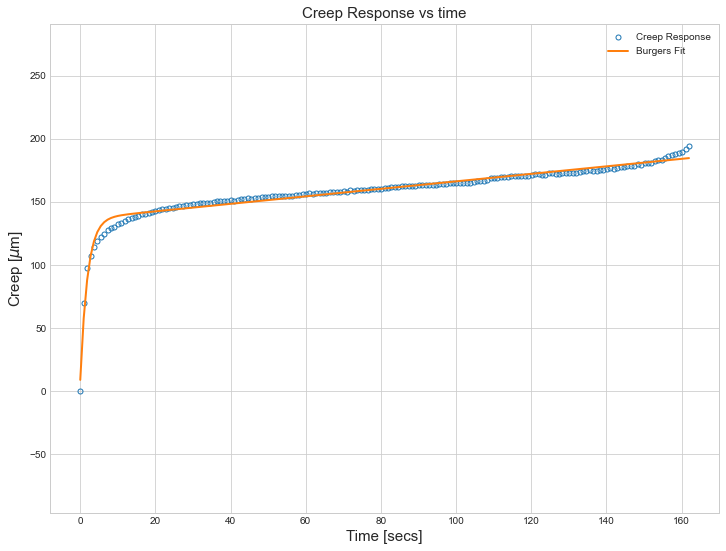

In [36]:
# Now, we will fit the Burgers model

def Burgers(t, A, B, C, D):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
    return A*t - B - C*(1-np.exp(-t/D))

def Residual_Burgers(p, x, y):
    return (y - Burgers(x, *p))

B0 = [100., 100., 100., 100.]

DataBopt, conv = opp.leastsq(Residual_Burgers, B0, args = (xvalues, yvalues))

YfitB = Burgers(xvalues, *DataBopt) 

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.figure(figsize =(12,9))
plt.plot(Database["Time Step (secs)"], Database["Creep ($\mu$m)"],  marker = "o", linestyle = "none", markersize = "5", label = "Creep Response", fillstyle = "none")
plt.plot(Database["Time Step (secs)"], YfitB, linestyle = "-", linewidth ="2", markersize = "2", label = "Burgers Fit")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)
plt.legend()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
DataBopt

Text(0.5, 1.0, 'Residual Plot (goodness of fit)')

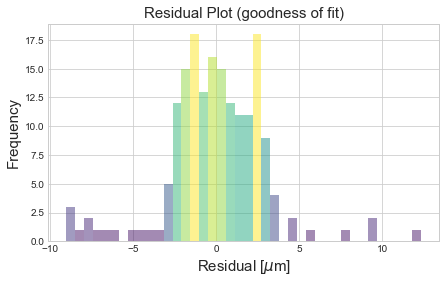

In [37]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Now we plot the residuals~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(2, figsize = (7,4))
plt.style.use("seaborn-whitegrid")
Residuals = yvalues - YfitB 
n, bins, patches = plt.hist(Residuals, bins = 40, alpha = 0.5, linewidth = 0.5)
n = n.astype("int")
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
plt.xlabel("Residual [$\mu$m]", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("Residual Plot (goodness of fit)", size = 15)


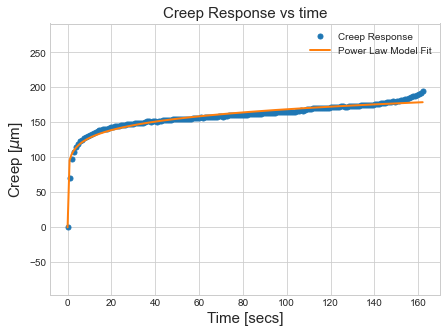

In [38]:
# Now, we will fit the power law model

def Power_law(t, A, B, C):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
    return A*t**B + C

def Residual_Power_law(p, x, y):
    return (y - Power_law(x, *p))

PL0 = [1., 1., 1.]

DataPLopt, conv = opp.leastsq(Residual_Power_law, PL0, args = (xvalues, yvalues))

YfitPL = Power_law(xvalues, *DataPLopt) 

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.figure(figsize =(7,5))
plt.plot(Database["Time Step (secs)"], Database["Creep ($\mu$m)"],  marker = "o", linestyle = "none", markersize = "5", label = "Creep Response")
plt.plot(Database["Time Step (secs)"], YfitPL, linestyle = "-", linewidth ="2", markersize = "2", label = "Power Law Model Fit")
plt.margins(0.05, 0.5)
plt.xlabel("Time [secs]", size = 15)
plt.ylabel("Creep [$\mu$m]", size = 15)
plt.title ("Creep Response vs time", size = 15)
plt.legend()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [39]:
DataPLopt

array([97.05054852,  0.12049181, -0.54769234])

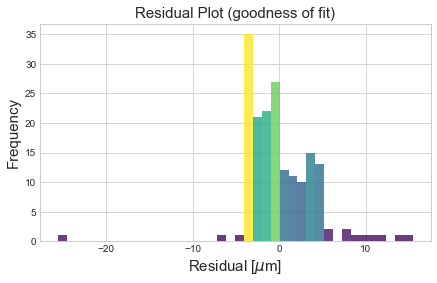

In [26]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Now we plot the residuals~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(2, figsize = (7,4))
plt.style.use("seaborn-whitegrid")
Residuals = yvalues - YfitPL 
n, bins, patches = plt.hist(Residuals, bins = 40, alpha = 0.8, linewidth = 0.5)
n = n.astype("int")
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
plt.xlabel("Residual [$\mu$m]", size = 15) 
plt.ylabel("Frequency", size = 15)
plt.title("Residual Plot (goodness of fit)", size = 15)
check1 = skew(Residuals)

In [27]:
check1 

-0.42292897748528435